In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import datetime as dt
import numpy as np
import fnmatch
import os

df = pd.read_csv("wiki_hindi_pageviews_2000_thru_Dec2019.csv")
df.head()

,Unnamed: 0,project,language,article,access,agent,granularity,date,views
0,1,wikipedia,hi,Kashmir conflict,all-access,all-agents,daily,2015-07-01,15
1,2,wikipedia,hi,Kashmir conflict,all-access,all-agents,daily,2015-07-02,10
2,3,wikipedia,hi,Kashmir conflict,all-access,all-agents,daily,2015-07-03,19
3,4,wikipedia,hi,Kashmir conflict,all-access,all-agents,daily,2015-07-04,10
4,5,wikipedia,hi,Kashmir conflict,all-access,all-agents,daily,2015-07-05,11


In [2]:
df = df[df['article'] == "Article 370 of the Constitution of India"]

df['ts'] = pd.to_datetime(df['date'])
df = df.drop('date', axis=1)

df.head()

,Unnamed: 0,project,language,article,access,agent,granularity,views,ts
1646,1647,wikipedia,hi,Article 370 of the Constitution of India,all-access,all-agents,daily,14,2016-10-17
1647,1648,wikipedia,hi,Article 370 of the Constitution of India,all-access,all-agents,daily,97,2016-10-18
1648,1649,wikipedia,hi,Article 370 of the Constitution of India,all-access,all-agents,daily,109,2016-10-19
1649,1650,wikipedia,hi,Article 370 of the Constitution of India,all-access,all-agents,daily,108,2016-10-20
1650,1651,wikipedia,hi,Article 370 of the Constitution of India,all-access,all-agents,daily,157,2016-10-21


Text(0.5, 1.0, 'Hindi Article 370 Pageviews per day')

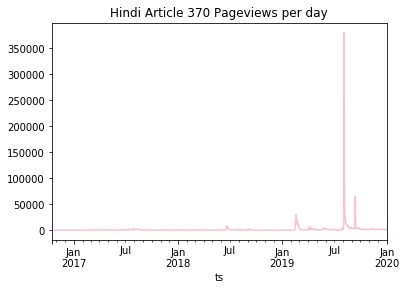

In [3]:
df = df.set_index('ts')

df['views'].plot(linestyle='-', linewidth=1.5, color = 'pink')

plt.title('Hindi Article 370 Pageviews per day')

Text(0.5, 1.0, 'Hindi Article 370 Pageviews per day log scale')

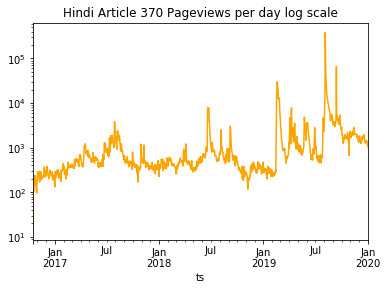

In [4]:
df['views'].plot(linestyle='-', linewidth=1.5, color = 'orange')
plt.yscale('log')
plt.title('Hindi Article 370 Pageviews per day log scale')

In [5]:
df2 = pd.read_csv("wiki_english_pageviews_2000_thru_Dec2019.csv")
df2 = df2[df2['article'] == 'Article_370_of_the_Constitution_of_India']

df2['ts'] = pd.to_datetime(df2['date'])
df2 = df2.drop('date', axis=1)

df2.head()

,Unnamed: 0,project,language,article,access,agent,granularity,views,ts
1646,1647,wikipedia,en,Article_370_of_the_Constitution_of_India,all-access,all-agents,daily,4,2015-07-01
1647,1648,wikipedia,en,Article_370_of_the_Constitution_of_India,all-access,all-agents,daily,1,2015-07-02
1648,1649,wikipedia,en,Article_370_of_the_Constitution_of_India,all-access,all-agents,daily,2,2015-07-03
1649,1650,wikipedia,en,Article_370_of_the_Constitution_of_India,all-access,all-agents,daily,4,2015-07-04
1650,1651,wikipedia,en,Article_370_of_the_Constitution_of_India,all-access,all-agents,daily,1,2015-07-05


Text(0.5, 1.0, 'English Article 370 Pageviews per day')

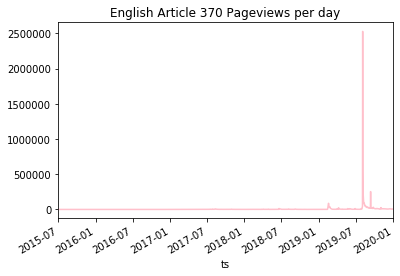

In [6]:
df2 = df2.set_index('ts')

df2['views'].plot(linestyle='-', linewidth=1.5, color = 'pink') 

plt.title('English Article 370 Pageviews per day')

Text(0.5, 1.0, 'English Article 370 Pageviews per day log scale')

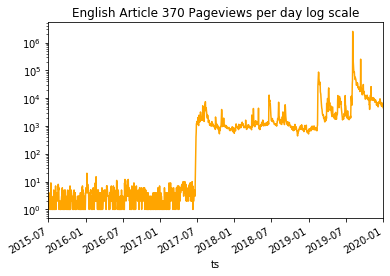

In [7]:
df2['views'].plot(linestyle='-', linewidth=1.5, color = 'orange')
plt.yscale('log')

plt.title('English Article 370 Pageviews per day log scale')

In [8]:
df3 = pd.read_csv("wiki_urdu_pageviews_2000_thru_Dec2019.csv")
df3 = df3[df3['article'] == "Article 370 of the Constitution of India"]

df3['ts'] = pd.to_datetime(df3['date'])
df3 = df3.drop('date', axis=1)

df3.head()

,Unnamed: 0,project,language,article,access,agent,granularity,views,ts
1646,1647,wikipedia,ur,Article 370 of the Constitution of India,all-access,all-agents,daily,80,2019-08-05
1647,1648,wikipedia,ur,Article 370 of the Constitution of India,all-access,all-agents,daily,382,2019-08-06
1648,1649,wikipedia,ur,Article 370 of the Constitution of India,all-access,all-agents,daily,262,2019-08-07
1649,1650,wikipedia,ur,Article 370 of the Constitution of India,all-access,all-agents,daily,218,2019-08-08
1650,1651,wikipedia,ur,Article 370 of the Constitution of India,all-access,all-agents,daily,222,2019-08-09


Text(0.5, 1.0, 'Urdu Article 370 Pageviews per day')

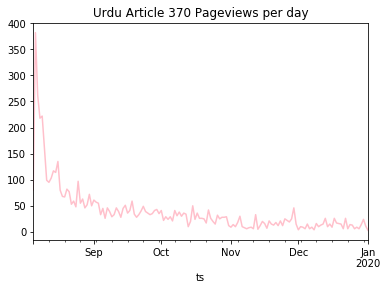

In [9]:
df3 = df3.set_index('ts')

df3['views'].plot(linestyle='-', linewidth=1.5, color = 'pink')

plt.title('Urdu Article 370 Pageviews per day')

Text(0.5, 1.0, 'Urdu Article 370 Pageviews per day log scale')

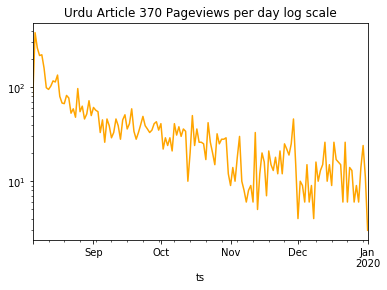

In [10]:
df3['views'].plot(linestyle='-', linewidth=1.5, color = 'orange')
plt.yscale('log')
plt.title('Urdu Article 370 Pageviews per day log scale')

In [11]:
# all at once, save
# IDK why there are errors here - the files get made, it seems to work fine
'''
for file in [ "wiki_hindi_pageviews_2000_thru_Dec2019.csv", "wiki_urdu_pageviews_2000_thru_Dec2019.csv", "wiki_english_pageviews_2000_thru_Dec2019.csv"]:

    df0 = pd.read_csv(file)
    
    if "hindi" in file:
        lang = "hindi"
    elif "english" in file:
        lang = "english"
    else:
        lang = "urdu"

    for article in ["Article 370 of the Constitution of India", "Kashmir conflict", "Insurgency in Jammu and Kashmir"]:
        try:
            df = df0[(df0['article'] == article) | (df0['article'] == article.replace(' ', '_'))]

            df['ts'] = pd.to_datetime(df['date'])
            df = df.drop('date', axis=1)

            df = df.set_index('ts')

            df['views'].plot(linestyle='-', linewidth=1.5, color = 'orange')
            plt.title(lang + ' ' + article + ' Pageviews per day')
                
            plt.savefig(lang + " " + article + "_pageviews_linear.png")

            plt.clf()

            df['views'].plot(linestyle='-', linewidth=1.5, color = 'orange')
            plt.yscale('log')
            plt.title(lang + ' ' + article + ' Pageviews per day log scale')
            plt.savefig(lang + " " + article + "_pageviews_log.png")

            plt.clf()

        except:
            print('exception')
            # do nothing - this will happen with Urdu on Insurgency article because there is no such article
'''

'\nfor file in [ "wiki_hindi_pageviews_2000_thru_Dec2019.csv", "wiki_urdu_pageviews_2000_thru_Dec2019.csv", "wiki_english_pageviews_2000_thru_Dec2019.csv"]:\n\n    df0 = pd.read_csv(file)\n    \n    if "hindi" in file:\n        lang = "hindi"\n    elif "english" in file:\n        lang = "english"\n    else:\n        lang = "urdu"\n\n    for article in ["Article 370 of the Constitution of India", "Kashmir conflict", "Insurgency in Jammu and Kashmir"]:\n        try:\n            df = df0[(df0[\'article\'] == article) | (df0[\'article\'] == article.replace(\' \', \'_\'))]\n\n            df[\'ts\'] = pd.to_datetime(df[\'date\'])\n            df = df.drop(\'date\', axis=1)\n\n            df = df.set_index(\'ts\')\n\n            df[\'views\'].plot(linestyle=\'-\', linewidth=1.5, color = \'orange\')\n            plt.title(lang + \' \' + article + \' Pageviews per day\')\n                \n            plt.savefig(lang + " " + article + "_pageviews_linear.png")\n\n            plt.clf()\n\n     

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 20189 (char 20188)

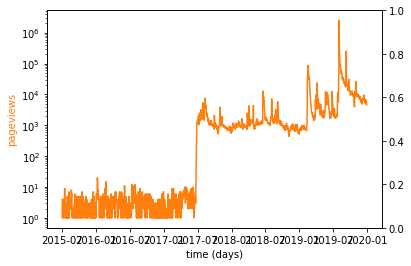

In [12]:
# English pageviews and edits plot....not super illuminating
# TODO would be nice if blue x were translucent

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('time (days)')
ax1.set_ylabel('pageviews', color=color)
ax1.plot(df2['views'], color=color)
plt.yscale('log')
#ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

mypath = "../data/revisions/"
for f in os.listdir(mypath):
    if fnmatch.fnmatch(f, 'rev_article_en_*.json'):
        file = f

#file = "rev_article_en_29-10-2019 23-52-48.json"

with open(mypath + file) as thefile:
        data = json.load(thefile)
        dfEdits = pd.DataFrame(data)
        
dfEdits['timestamp'] = pd.to_datetime(dfEdits['timestamp'])
dfEdits = dfEdits.set_index('timestamp')
dfEdits = dfEdits.groupby(pd.Grouper(freq='D', level=0)).count()

color = 'tab:blue'
ax2.set_ylabel('edits', color=color)  # we already handled the x-label with ax1
ax2.plot(dfEdits['user'], marker='x', linestyle='', color=color)
#ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped


In [15]:
def findfile(prefix):
    '''
    This is for finding the file you want, no matter the date in the filename
    Assumes the folder has only the most recent files in it
    '''
    for f in os.listdir(mypath):
        if fnmatch.fnmatch(f, prefix + '_*.json'):
            return f

In [16]:
# Correlation

def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """ 
    return datax.corr(datay.shift(lag))

# pandas timezone weirdness requires:
dfEdits.index = dfEdits.index.date

print(dfEdits.index)



NameError: name 'dfEdits' is not defined

In [ ]:
dfEdits.head()

In [17]:
def corrPlot(views, edits, what):
    '''
    TIME-LAGGED CROSS-CORRELATION
    -2 week to 2 week lag
    Correlation computed between views per day and edits per day
    We "know" that edits don't lead pageviews, so in a perfect world there would be no correlation to the right of
    center. Interesting results to follow!
    '''
    rs = [crosscorr(views, edits, lag) for lag in range(int(-14),int(15))]
    # Offset tells what lag yielded peak synchrony (positive = views led; negative = edits led)
    offset = np.floor(len(rs)/2)-np.argmax(rs)
    f,ax=plt.subplots(figsize=(14,3))
    ax.plot(rs)
    ax.axvline(np.floor(len(rs)/2),color='k',linestyle='--',label='Center')
    ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
    ax.set(title=f'Offset = {offset} days\nviews leads <> edits leads',ylim=[0,1],xlim=[0,28], xlabel='Offset',ylabel='Pearson r')
    # TICKS are -14 to 14: the offsets we set
    ax.set_xticks([0, 7, 14, 21, 28])
    ax.set_xticklabels([-14, -7, 0, 7, 14]);
    plt.suptitle(what + " correlation between pageviews and edits", y=1.1)
    plt.legend()
    

def getEdits(filepath):
    '''
    Get edits dataframe given filepath. File must be json.
    '''
    with open(filepath) as thefile:
            data = json.load(thefile)
            dfEdits = pd.DataFrame(data)

    dfEdits['timestamp'] = pd.to_datetime(dfEdits['timestamp'])
    dfEdits = dfEdits.set_index('timestamp')
    dfEdits = dfEdits.groupby(pd.Grouper(freq='D', level=0)).count()

    # pandas timezone weirdness requires that we do this
    dfEdits.index = dfEdits.index.date

    # total edits = edits by registered users + "anonymous" edits (IP addresses and people who wish to remain anon)
    if 'anon' in dfEdits.columns:
        dfEdits['total'] = dfEdits['user'] + dfEdits['anon']
    else: # Pulwama Urdu (and maybe others) don't have the anon field
        dfEdits['total'] = dfEdits['user']
    
    return dfEdits


def getViews(filepath, article):
    '''
    Get pageviews dataframe given filepath. File must be csv.
    '''
    df = pd.read_csv(filepath)
    df = df[df['article'] == article]

    df['ts'] = pd.to_datetime(df['date'])
    df = df.drop('date', axis=1)
    df = df.set_index('ts')
    
    return df



            user  size  comment  anon  total
2019-02-15    29    29       29     0     29
2019-02-16    46    46       46     0     46
2019-02-17   106   106      106     0    106
2019-02-18    67    67       67    10     77
2019-02-19    35    35       35     0     35


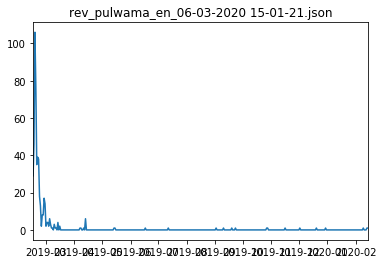

            user  anon  size  comment  total
2019-02-15    27     0    27       27     27
2019-02-16     5     0     5        5      5
2019-02-17     7     3     7        7     10
2019-02-18     1     0     1        1      1
2019-02-19     0     0     0        0      0


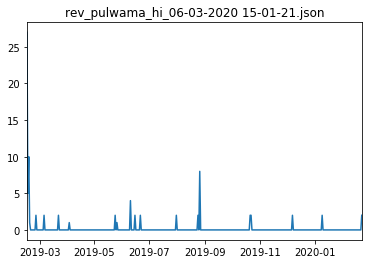

            user  size  comment  total
2019-02-15    12    12       12     12
2019-02-16    55    55       55     55
2019-02-17     4     4        4      4
2019-02-18     5     5        5      5
2019-02-19     0     0        0      0


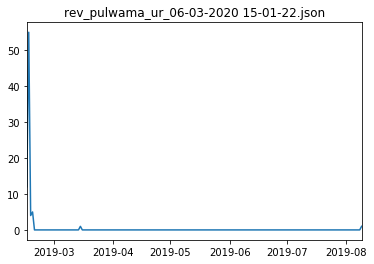

In [18]:
# PULWAMA EDITS

mypath = "../data/revisions/"
for file in [findfile("rev_pulwama_en"), findfile("rev_pulwama_hi"),
             findfile("rev_pulwama_ur")]:
        edits = getEdits(mypath + file)
        print(edits.head())
        edits['total'].plot(linestyle='-', linewidth=1.5, title=file)
        plt.show()

            user  size  comment  anon  total
2019-08-06    36    36       36     1     37
2019-08-07    26    26       26     6     32
2019-08-08     8     8        8     0      8
2019-08-09    16    16       16     0     16
2019-08-10    17    17       17     4     21


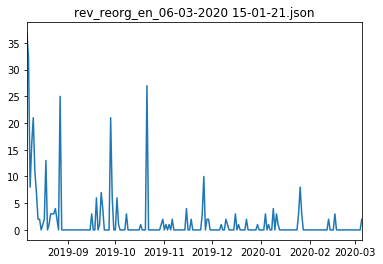

            user  size  comment  total
2019-08-07     8     8        8      8
2019-08-08     1     1        1      1
2019-08-09    47    47       47     47
2019-08-10     9     9        9      9
2019-08-11     0     0        0      0


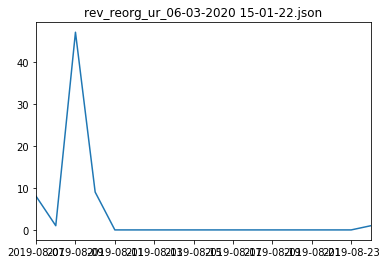

In [19]:
# REORGANISATION EDITS

mypath = "../data/revisions/"
for file in [findfile("rev_reorg_en"), findfile("rev_reorg_ur")]:
        edits = getEdits(mypath + file)
        print(edits.head())
        edits['total'].plot(linestyle='-', linewidth=1.5, title=file)
        plt.show()

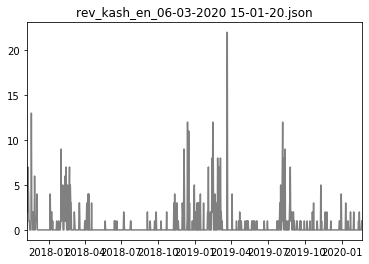

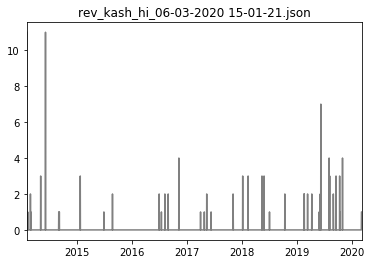

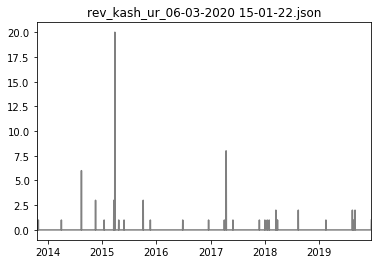

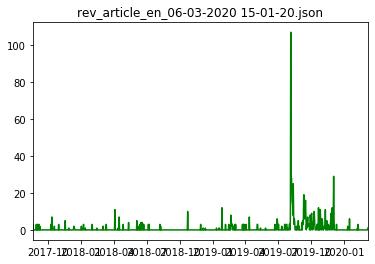

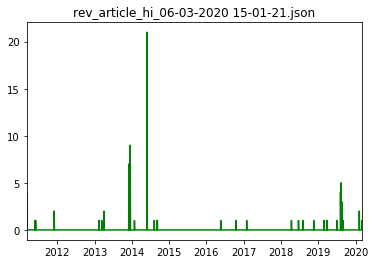

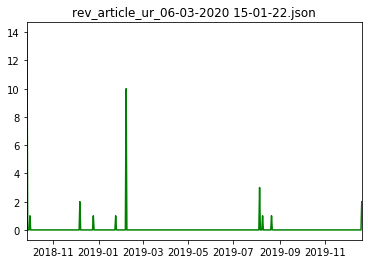

            user  size  comment  total
2012-08-13     1     1        1      1
2012-08-14     0     0        0      0
2012-08-15     0     0        0      0
2012-08-16     0     0        0      0
2012-08-17     0     0        0      0


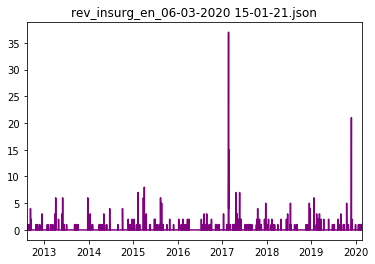

            user  size  comment  anon  total
2011-04-14     1     1        1     0      1
2011-04-15     0     0        0     0      0
2011-04-16     0     0        0     0      0
2011-04-17     0     0        0     0      0
2011-04-18     0     0        0     0      0


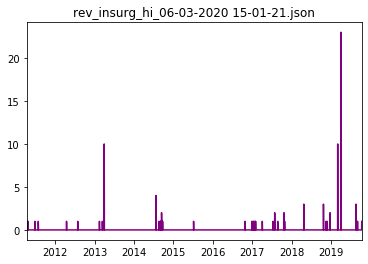

In [41]:
# THE OG ARTICLES

for file in [findfile("rev_kash_en"), findfile("rev_kash_hi"), findfile("rev_kash_ur")]:
        edits = getEdits(mypath + file)
        edits['total'].plot(linestyle='-', linewidth=1.5, title=file, color="gray")
        plt.show()
        
for file in [findfile("rev_article_en"), findfile("rev_article_hi"), findfile("rev_article_ur")]:
        edits = getEdits(mypath + file)
        edits['total'].plot(linestyle='-', linewidth=1.5, title=file, color="green")
        plt.show()
        
for file in [findfile("rev_insurg_en"), findfile("rev_insurg_hi")]:
        edits = getEdits(mypath + file)
        print(edits.head())
        edits['total'].plot(linestyle='-', linewidth=1.5, title=file, color="purple")
        plt.show()

In [42]:
for f in os.listdir(mypath):
    if fnmatch.fnmatch(f, 'rev_article_en_*.json'):
        file = f

mypath = "../data/revisions/" + file
    
dfEdits = getEdits(mypath)

In [43]:
dfEdits.tail()

,user,size,comment,anon,total
2020-03-02,0,0,0,0,0
2020-03-03,0,0,0,0,0
2020-03-04,0,0,0,0,0
2020-03-05,0,0,0,0,0
2020-03-06,1,1,1,0,1


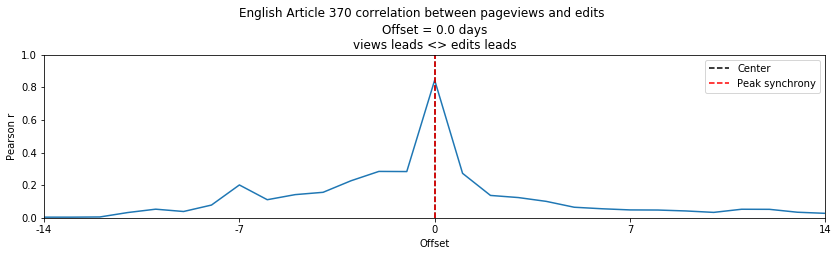

In [44]:
corrPlot(df2['views'], dfEdits['total'], "English Article 370")

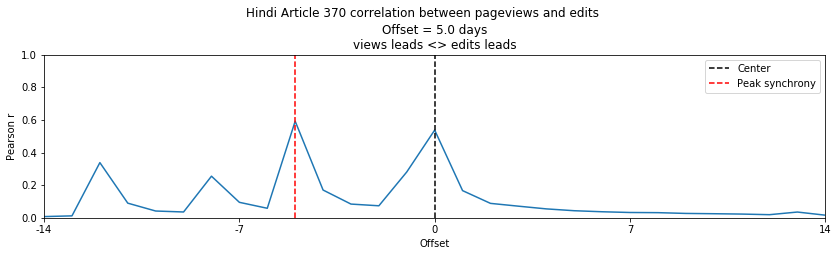

In [45]:
# Hindi

mypath = "../data/revisions/"

for f in os.listdir(mypath):
    if fnmatch.fnmatch(f, 'rev_article_hi_*.json'):
        file = f

edits = getEdits("../data/revisions/" + file)

corrPlot(df['views'], edits['total'], "Hindi Article 370")

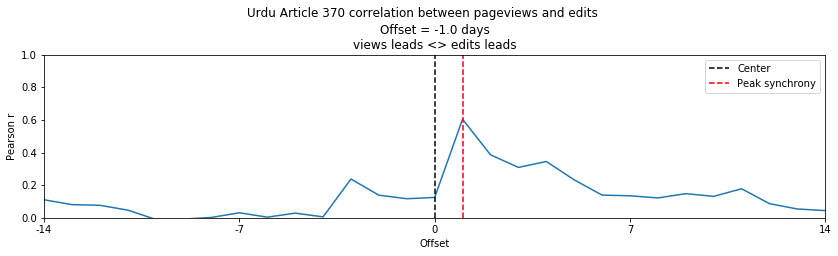

In [46]:
# Urdu

for f in os.listdir(mypath):
    if fnmatch.fnmatch(f, 'rev_article_ur_*.json'):
        file = f

edits = getEdits("../data/revisions/" + file)

corrPlot(df3['views'], edits['total'], "Urdu Article 370")

In [47]:
# Kashmir Conflict

# English

for f in os.listdir(mypath):
    if fnmatch.fnmatch(f, 'rev_kash_en_*.json'):
        file = f

views = getViews("wiki_english_pageviews_2000_thru_Dec2019.csv", "Kashmir_conflict")
edits = getEdits("../data/revisions/" + file)

views.head()

,Unnamed: 0,project,language,article,access,agent,granularity,views
ts,,,,,,,,
2015-07-01,1,wikipedia,en,Kashmir_conflict,all-access,all-agents,daily,1492
2015-07-02,2,wikipedia,en,Kashmir_conflict,all-access,all-agents,daily,1381
2015-07-03,3,wikipedia,en,Kashmir_conflict,all-access,all-agents,daily,1417
2015-07-04,4,wikipedia,en,Kashmir_conflict,all-access,all-agents,daily,1777
2015-07-05,5,wikipedia,en,Kashmir_conflict,all-access,all-agents,daily,1571


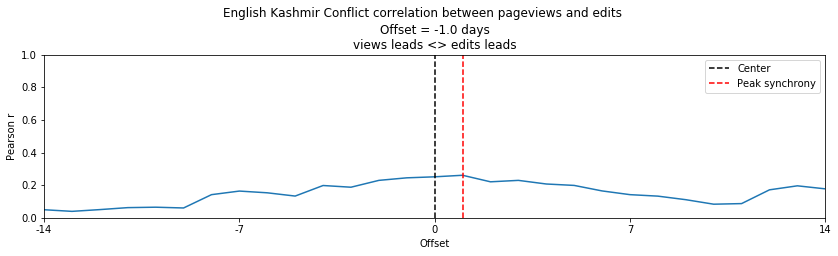

In [48]:
corrPlot(views['views'], edits['total'], "English Kashmir Conflict")

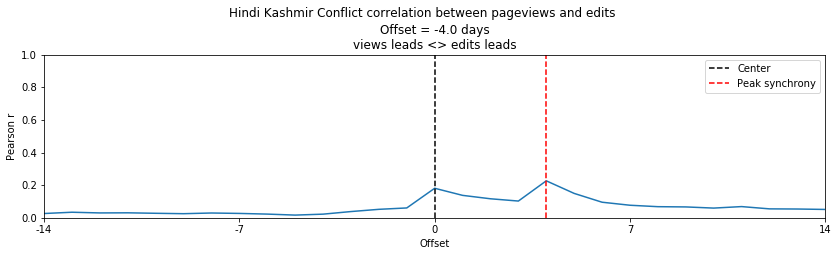

In [49]:
# Hindi

for f in os.listdir(mypath):
    if fnmatch.fnmatch(f, 'rev_kash_hi_*.json'):
        file = f

views = getViews("wiki_hindi_pageviews_2000_thru_Dec2019.csv", "Kashmir conflict")
edits = getEdits("../data/revisions/" + file)
corrPlot(views['views'], edits['total'], "Hindi Kashmir Conflict")

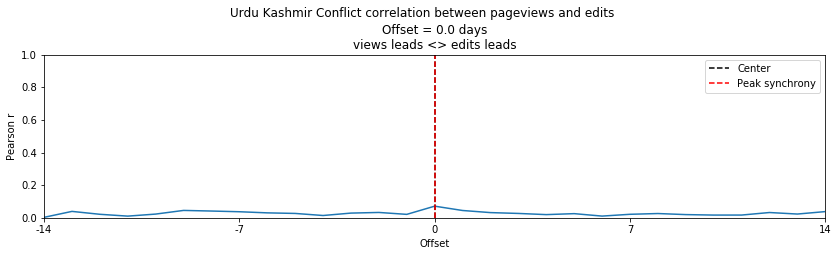

In [50]:
# Urdu

for f in os.listdir(mypath):
    if fnmatch.fnmatch(f, 'rev_kash_ur_*.json'):
        file = f

views = getViews("wiki_urdu_pageviews_2000_thru_Dec2019.csv", "Kashmir conflict")
edits = getEdits("../data/revisions/" + file)
corrPlot(views['views'], edits['total'], "Urdu Kashmir Conflict")

In [51]:
del edits
del views

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


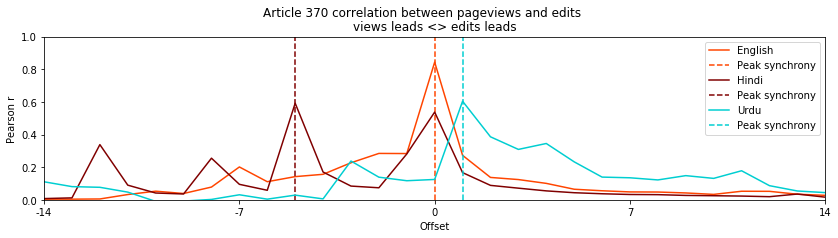

In [76]:
def corrPlotOverlay(views, edits, viewsH, editsH, viewsU, editsU):
    '''
    TIME-LAGGED CROSS-CORRELATION
    -2 week to 2 week lag
    Correlation computed between views per day and edits per day
    We "know" that edits don't lead pageviews, so in a perfect world there would be no correlation to the right of
    center. Interesting results to follow!
    '''
    color = 'orangered'
    
    r = []
    l = []
        
    rs = [crosscorr(views, edits, lag) for lag in range(int(-14),int(15))]
    for pearson in rs:
        r.append(pearson)
    for i in range(len(rs)):
        l.append('en')
    f,ax=plt.subplots(figsize=(14,3))
    
    # Offset tells what lag yielded peak synchrony (positive = views led; negative = edits led)
    ax.plot(rs, color=color, label='English')
    ax.axvline(np.argmax(rs),color=color,linestyle='--',label='Peak synchrony')
    ax.set(title='views leads <> edits leads',ylim=[0,1],xlim=[0,28], xlabel='Offset',ylabel='Pearson r')
    # TICKS are -14 to 14: the offsets we set
    ax.set_xticks([0, 7, 14, 21, 28])
    ax.set_xticklabels([-14, -7, 0, 7, 14]);
    
    # Second set
    color = 'maroon'
    rs = [crosscorr(viewsH, editsH, lag) for lag in range(int(-14),int(15))]
    for pearson in rs:
        r.append(pearson)
    for i in range(len(rs)):
        l.append('hi')
    # Offset tells what lag yielded peak synchrony (positive = views led; negative = edits led)
    offset = np.floor(len(rs)/2)-np.argmax(rs)
    ax.plot(rs, color=color, label='Hindi')
    ax.axvline(np.argmax(rs),color=color,linestyle='--',label='Peak synchrony')
    
    # Third set
    color = 'darkturquoise'
    rs = [crosscorr(viewsU, editsU, lag) for lag in range(int(-14),int(15))]
    for pearson in rs:
        r.append(pearson)
    for i in range(len(rs)):
        l.append('ur')
    # Offset tells what lag yielded peak synchrony (positive = views led; negative = edits led)
    offset = np.floor(len(rs)/2)-np.argmax(rs)
    ax.plot(rs, color=color, label='Urdu')
    ax.axvline(np.argmax(rs),color=color,linestyle='--',label='Peak synchrony')
        
    plt.suptitle("Article 370 correlation between pageviews and edits", y=1.02)
    plt.legend()
    
    d = {'lang': l, 'pearson': r}
    df = pd.DataFrame(data=d)
    return df

        
viewsEn = getViews("wiki_english_pageviews_2000_thru_Dec2019.csv", "Article_370_of_the_Constitution_of_India")
editsEn = getEdits("../data/revisions/" + findfile("rev_article_en"))

viewsHi = getViews("wiki_hindi_pageviews_2000_thru_Dec2019.csv", "Article 370 of the Constitution of India")
editsHi = getEdits("../data/revisions/" + findfile("rev_article_hi"))

viewsUr = getViews("wiki_urdu_pageviews_2000_thru_Dec2019.csv", "Article 370 of the Constitution of India")
editsUr = getEdits("../data/revisions/" + findfile("rev_article_ur"))

pearson_df = corrPlotOverlay(viewsEn['views'], editsEn['total'], viewsHi['views'], editsHi['total'], viewsUr['views'], editsUr['total'])


plt.savefig("views_edits_article370_corr.eps")

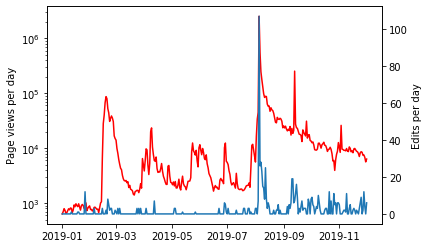

In [61]:
def tsViewsEdits(views, edits, lang):
    '''
    Just want plot with two time series: edits and views. One call to this fun per language
    '''
    views = views[dt.date(2019,1,1):dt.date(2019,12,1)]# temporary...
    edits = edits[dt.date(2019,1,1):dt.date(2019,12,1)]# temporary...
    # Views
    fig,ax = plt.subplots()
    plt.yscale('log')
    ax.plot(views.index, views.views, color="red")
    ax.set_ylabel("Page views per day")
    # Edits    
    ax2 = ax.twinx()
    ax2.plot(edits.index, edits.total)
    ax2.set_ylabel("Edits per day")
    #plt.show()
    
    plt.savefig("views_edits_article370_ts_"+lang+".eps")

editsEn2 = editsEn

editsEn2.set_index(pd.to_datetime(editsEn2.index))

tsViewsEdits(viewsEn, editsEn2, "english")

In [77]:
pearson_df

,lang,pearson
0,en,0.003898
1,en,0.003890
2,en,0.005091
3,en,0.032261
4,en,0.052830
...,...,...
82,ur,0.131326
83,ur,0.178117
84,ur,0.086639
85,ur,0.054044


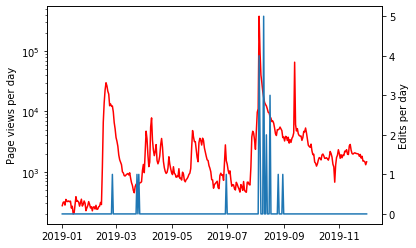

In [62]:
editsHi2 = editsHi

editsHi2.set_index(pd.to_datetime(editsHi2.index))

tsViewsEdits(viewsHi, editsHi2, "hindi")

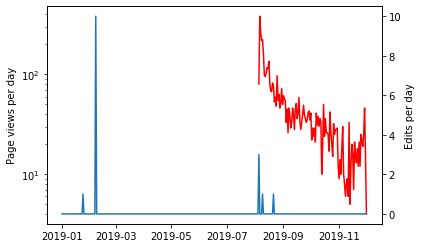

In [63]:
editsUr2 = editsUr

editsUr2.set_index(pd.to_datetime(editsUr2.index))

tsViewsEdits(viewsUr, editsUr2, "urdu")

In [54]:
editsEn2[dt.date(2019,8,6):dt.date(2019,8,7)] # THIS SHOULD BE 26 and 28

,user,size,comment,anon,total
2019-08-06,26,26,26,0,26
2019-08-07,28,28,28,0,28


In [55]:
editsEn.head

<bound method NDFrame.head of             user  size  comment  anon  total
2017-08-20     2     2        2     1      3
2017-08-21     0     0        0     0      0
2017-08-22     0     0        0     0      0
2017-08-23     0     0        0     0      0
2017-08-24     0     0        0     0      0
...          ...   ...      ...   ...    ...
2020-03-02     0     0        0     0      0
2020-03-03     0     0        0     0      0
2020-03-04     0     0        0     0      0
2020-03-05     0     0        0     0      0
2020-03-06     1     1        1     0      1

[930 rows x 5 columns]>